## project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
url = "https://raw.githubusercontent.com/Matan97/Project1/main/music_effects.csv"

In [3]:
df = pd.read_csv(url)
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Latin],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Never,Very frequently,Very frequently,Never,3.0,0.0,1.0,0.0,NaN
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,Rock,Yes,No,119.0,...,Sometimes,Never,Sometimes,Rarely,Very frequently,7.0,2.0,2.0,1.0,NaN
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,Video game music,No,Yes,132.0,...,Never,Sometimes,Rarely,Rarely,Rarely,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Jazz,Yes,Yes,84.0,...,Very frequently,Never,Sometimes,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,R&B,Yes,No,107.0,...,Sometimes,Never,Sometimes,Very frequently,Never,7.0,2.0,5.0,9.0,Improve


In [4]:
df['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [5]:
df['Music effects'].fillna('No effect', inplace = True)

In [6]:
df['Music effects'].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

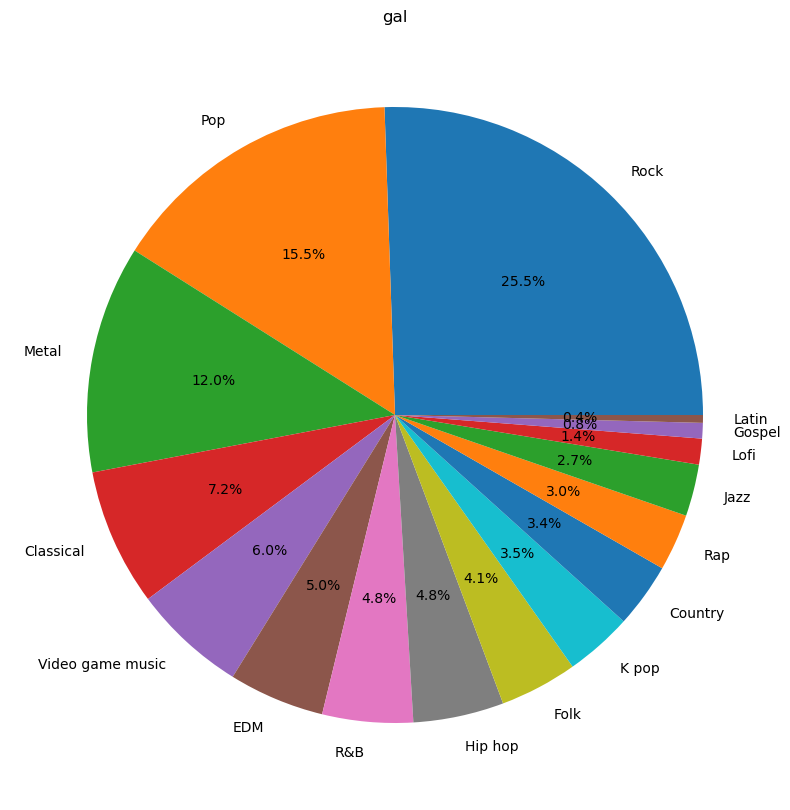

In [7]:
plt.figure(1, figsize=(10,10))
plt.title("gal")
df['Fav genre'].value_counts().plot.pie(autopct="%1.1f%%") #try removing this - what happens?
plt.ylabel("")  #try removing this - what happens?
plt.show()
#sns.countplot(x='Fav genre', data=df)
#plt.xticks(rotation=45,ha = 'right')
#plt.show()

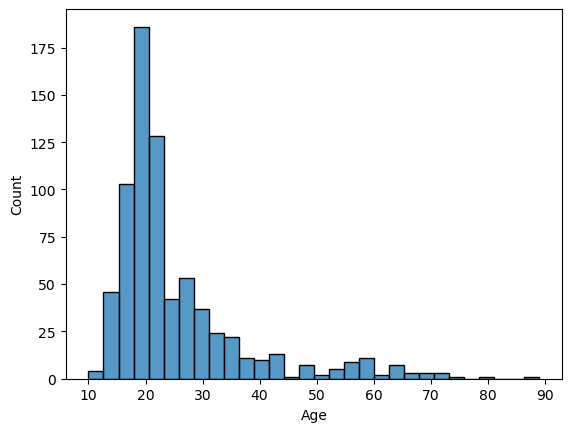

In [8]:
sns.histplot(df['Age'], bins=30)
plt.show()

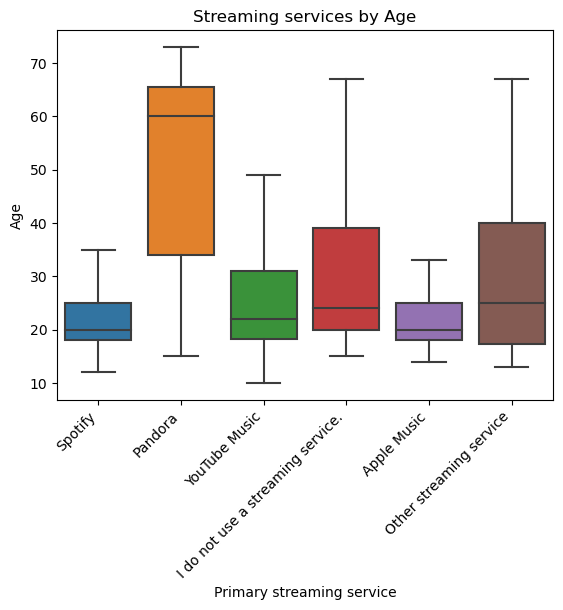

In [9]:
new = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False)
plt.xticks(rotation=45,ha='right')
plt.title('Streaming services by Age')
plt.show()

In [10]:
features = ['While working','Instrumentalist','Exploratory','Foreign languages','Music effects']
melted_df = pd.melt(df[features], value_vars = features)

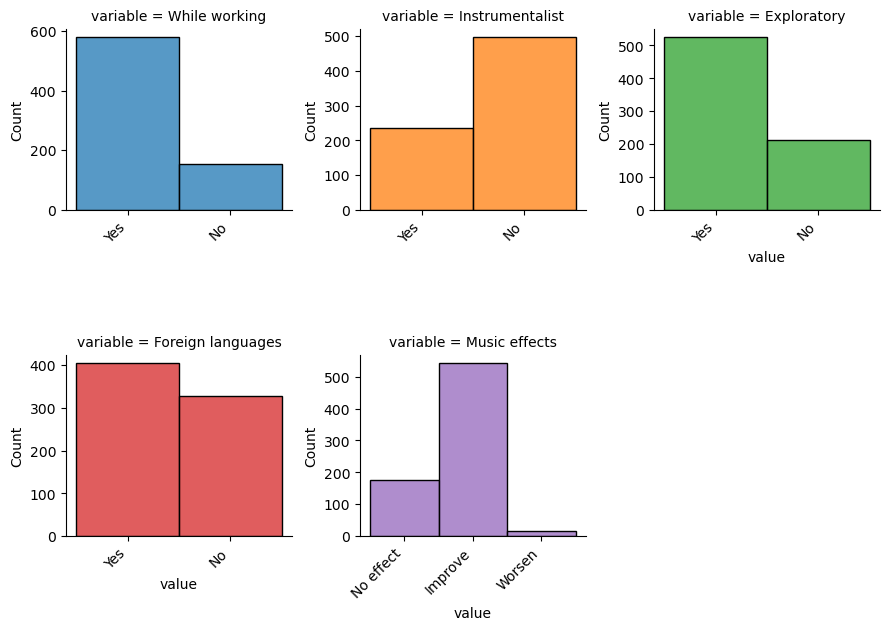

In [29]:
grid_histplots = sns.FacetGrid(melted_df, col="variable" ,  hue="variable" ,col_wrap=3, height = 3,sharey = False,sharex = False)
grid_histplots.map_dataframe(sns.histplot,  x= 'value')
grid_histplots.set_xticklabels(rotation=45,horizontalalignment='right')
plt.subplots_adjust(wspace = 0.3, hspace=0.8)
plt.show()

In [12]:
features = ['Hours per day','Anxiety','Depression','Insomnia','OCD']
corr_df = df[features].corr()

<AxesSubplot:>

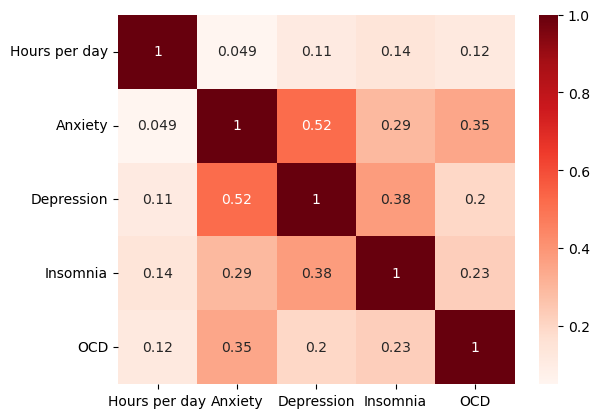

In [13]:
sns.heatmap(data=corr_df,cmap='Reds', annot=True)

In [14]:
#,'Frequency [Hip hop]','Frequency [Jazz]','Frequency [Latin]','Frequency [Metal]'\
#             ,'Frequency [Pop]', 'Frequency [Rap]','Frequency [Rock]']

<AxesSubplot:ylabel='Hours per day'>

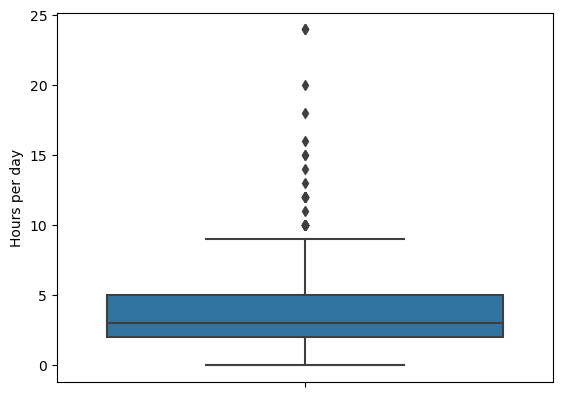

In [15]:
sns.boxplot(y='Hours per day', data=df)

<AxesSubplot:ylabel='Hours per day'>

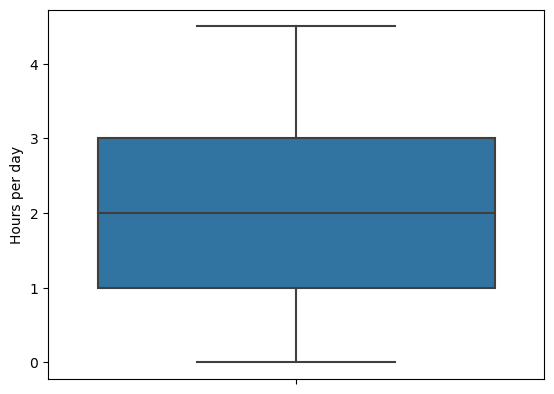

In [16]:
hours_df = df[df['Hours per day']<5].copy()
sns.boxplot(y='Hours per day', data=hours_df)

In [17]:
features1 = ['Hours per day','Music effects']
dummies = pd.get_dummies(hours_df[features1])

In [18]:
corr_df1 = dummies.corr()

<AxesSubplot:>

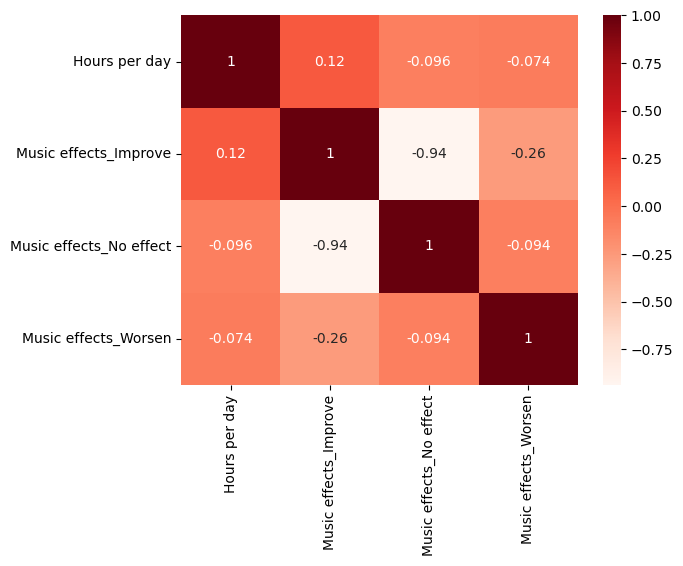

In [19]:
sns.heatmap(data=corr_df1,cmap='Reds', annot=True)

In [20]:
df.groupby('Frequency [Pop]')[['Anxiety']].median()

,Anxiety
Frequency [Pop],
Never,5.0
Rarely,6.0
Sometimes,6.0
Very frequently,7.0


In [21]:
df.groupby('Frequency [Rock]')[['Depression']].median()

,Depression
Frequency [Rock],
Never,3.0
Rarely,3.5
Sometimes,5.0
Very frequently,6.0


In [22]:
new_df = df.groupby('Frequency [Classical]')[['Anxiety','Depression','Insomnia']].median()
new_df

,Anxiety,Depression,Insomnia
Frequency [Classical],,,
Never,7.0,5.0,3.0
Rarely,6.0,5.0,3.0
Sometimes,7.0,5.5,3.0
Very frequently,6.0,5.0,4.0


<AxesSubplot:xlabel='Fav genre', ylabel='count'>

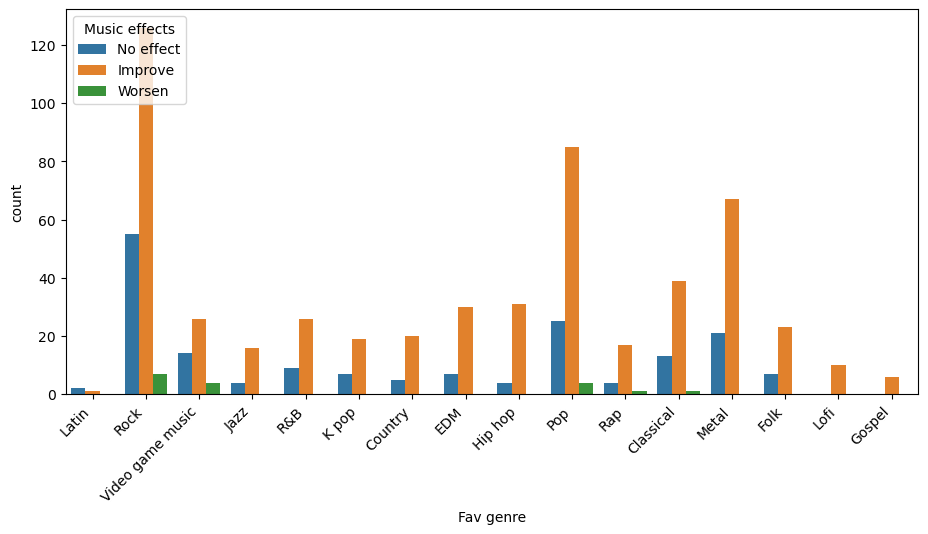

In [23]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=45,ha='right')
sns.countplot(x="Fav genre" , hue = 'Music effects' ,data=df)

In [24]:
genre_depres = df.groupby('Fav genre')[['Insomnia']].mean().sort_values(by = 'Insomnia', ascending = False).reset_index()

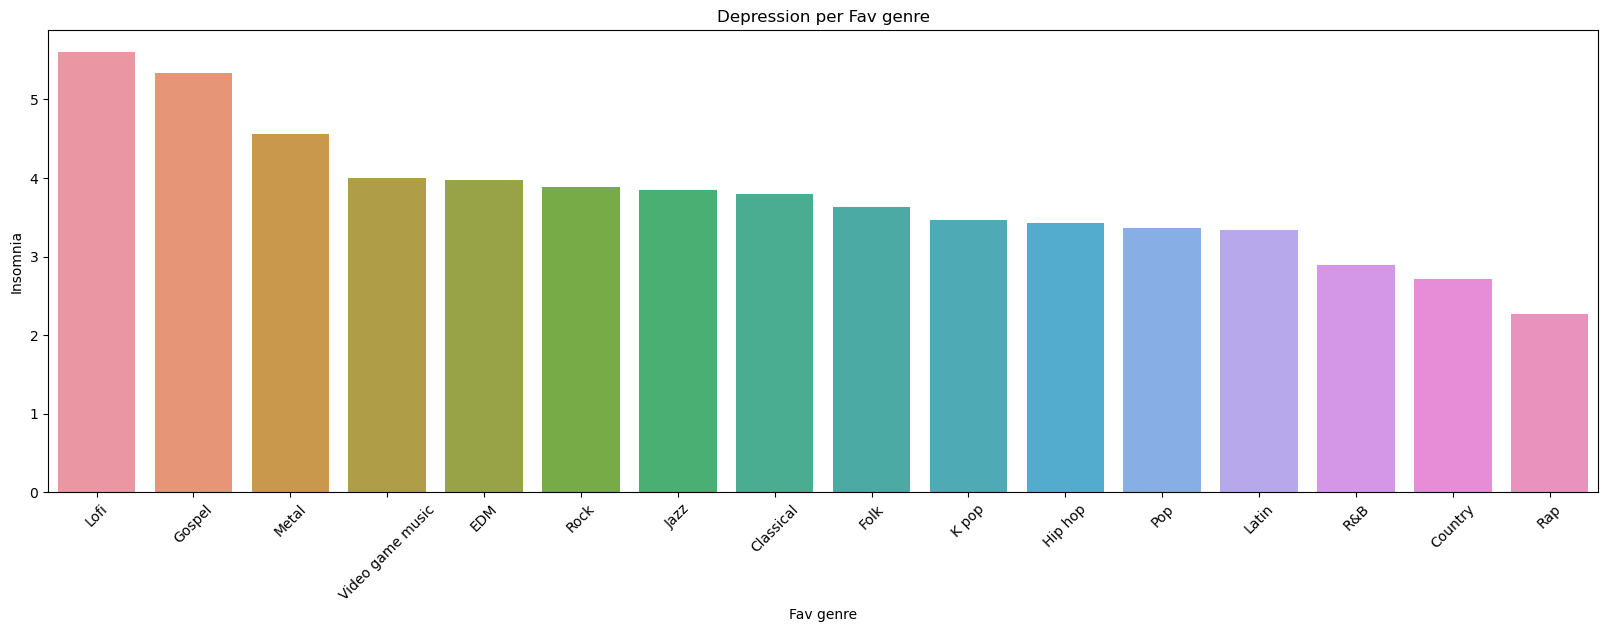

In [25]:
plt.subplots(figsize=(20,6))
ax = sns.barplot(data = genre_depres, x="Fav genre" , y="Insomnia")
plt.xticks(rotation = 45)
plt.title("Depression per Fav genre")
plt.show()

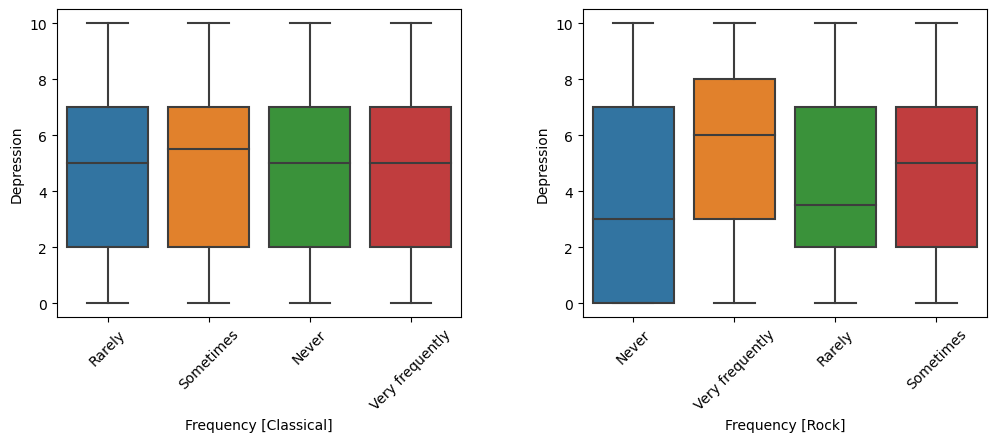

In [26]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.3, hspace=0.5)
sns.boxplot(x='Frequency [Classical]', y='Depression', data=df, ax = ax[0])
sns.boxplot(x='Frequency [Rock]', y='Depression', data=df, ax = ax[1])
ax[0].tick_params(axis='x',rotation=45)
ax[1].tick_params(axis='x', rotation=45)
plt.show()

In [27]:
df.groupby('Primary streaming service')[['Hours per day']].sum().sort_values(by = 'Hours per day', ascending = False)

,Hours per day
Primary streaming service,
Spotify,1757.50
YouTube Music,302.75
I do not use a streaming service.,209.75
Apple Music,181.50
Other streaming service,149.55
Pandora,23.50


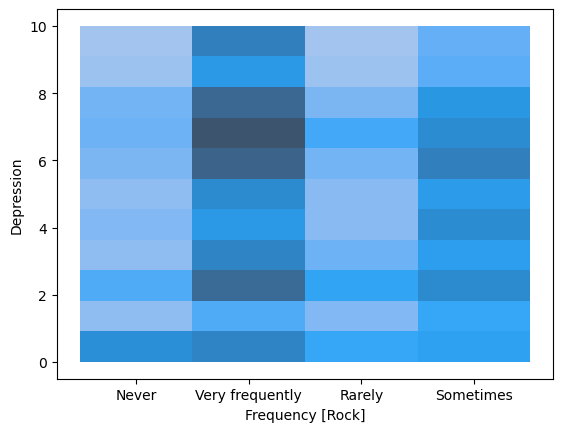

In [54]:
sns.histplot(x='Frequency [Rock]', y='Depression', data=df)
plt.show()

In [56]:
df.shape

(736, 23)